# **Customer Churn Prediction** 

## **I. Business Understanding**

Customer churn is a critical challenge for businesses, particularly in the highly competitive telecommunications industry. High churn rates not only reduce revenue but also increase customer acquisition costs, as retaining existing customers is often more cost-effective than acquiring new ones. Understanding the factors that lead to customer churn allows telecommunications providers to take proactive measures to retain customers and maintain a steady revenue stream.

To address this challenge, we aim to analyze data on customer behaviors, service usage, and engagement with the telecommunications provider. By developing a predictive model, we can identify key drivers of churn and develop targeted strategies to improve customer retention.

## **II. Data Preparation**

Overall, the dataset contains information about customers' geographic and service-related details with a telecommunications provider. Geographic information includes the customer's state of residence and area code, which provide some insight into their demographic profile. Account details such as the length of time with the provider, and service plans, like whether the customer has an international or voicemail plan, help characterize the customer's engagement with the service. Usage metrics capture total minutes, number of calls, and charges for different periods (day, evening, night) and types of calls (domestic vs. international). Additionally, the dataset records the number of customer service interactions and whether the customer ultimately churned.

Our objective is to analyze this data and develop a model that predicts whether a customer is likely to churn, helping the provider identify key drivers of customer retention and develop strategies to reduce churn rates.

### **1. Import libraries**

In [573]:
# Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

### **2. Read file**

In [574]:
file_path = r'C:\Users\ADMIN\Downloads\customer_churn.csv'
file_path_predict = r'C:\Users\ADMIN\Downloads\customer_churn_predict.csv'
df = pd.read_csv(file_path)
data_predict = pd.read_csv(file_path_predict)

In [575]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [576]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns:", categorical_cols)

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical columns:", numerical_cols)

Categorical columns: ['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']
Numerical columns: ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']


In [577]:
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [578]:
df.describe(include='O')

,state,area_code,international_plan,voice_mail_plan,churn
count,4250,4250,4250,4250,4250
unique,51,3,2,2,2
top,WV,area_code_415,no,no,no
freq,139,2108,3854,3138,3652


In [579]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


## **III. EDA**

### **1. Univariate analysis**

Sửa code đoạn này cho nó nhìn đồng nhất với bên dưới

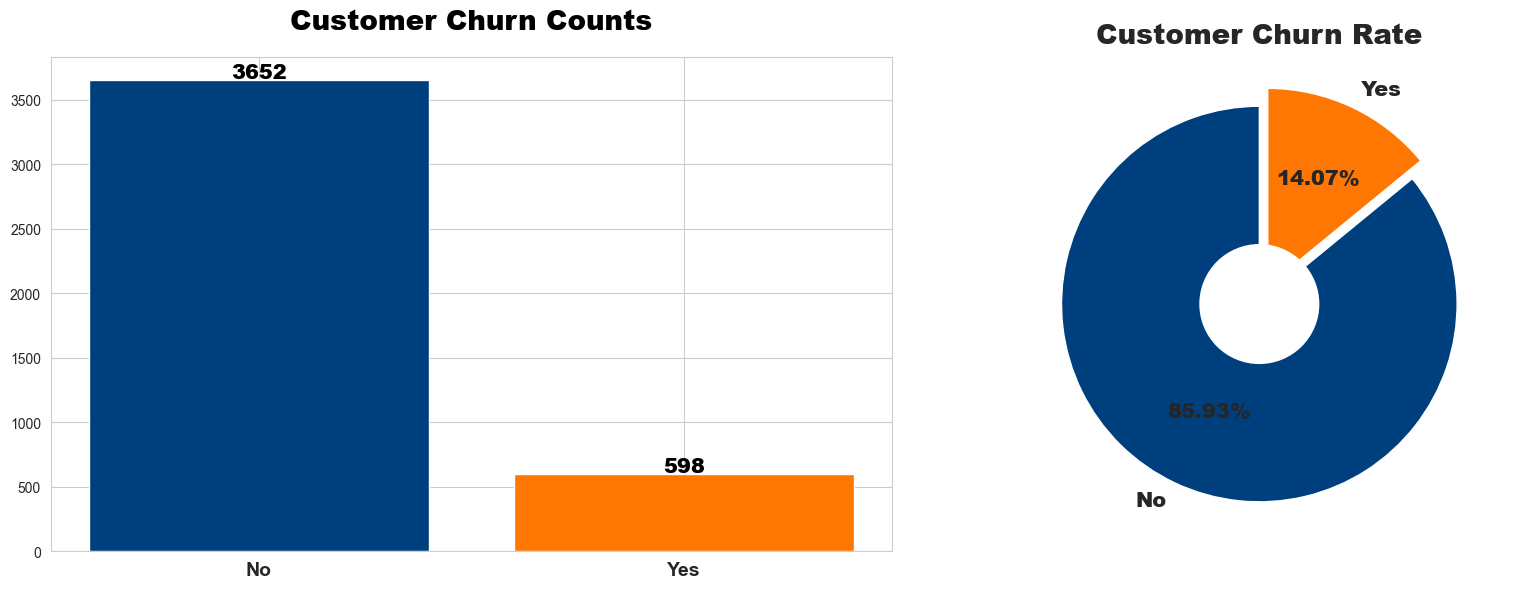

In [580]:
churn_rate = df["churn"].value_counts()
churn_labels = ["No", "Yes"] 
colors = ["#003F7D", '#FD7702']  

# Create subplots for bar plot and pie chart
fig, axes = plt.subplots(1, 2, figsize=(17, 6))

# Bar plot on the left
axes[0].bar(churn_rate.index, churn_rate.values, color=colors)
axes[0].set_title("Customer Churn Counts", fontweight="black", color = 'black', size=20, pad=20)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(churn_labels, fontweight='bold', fontsize=14)
axes[0].set_xlabel('')

# Adding value labels on top of the bars
for i, v in enumerate(churn_rate.values):
    axes[0].text(i, v + 20, str(v), ha="center", fontweight='black', color = 'black', fontsize=15)

# Pie chart on the right
axes[1].pie(churn_rate, labels=churn_labels, autopct="%.2f%%", textprops={"fontweight": "black", "size": 15},
            colors=colors, explode=[0, 0.1], startangle=90)

# White circle in the center of the pie chart for donut appearance
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig.gca().add_artist(center_circle)
axes[1].set_title("Customer Churn Rate", fontweight="black", size=20, pad=10)

plt.tight_layout()
plt.show()

The number of customer churn is 598, which accounted for 14.07% of total customers. This is a normal churn rate for a provider company. 

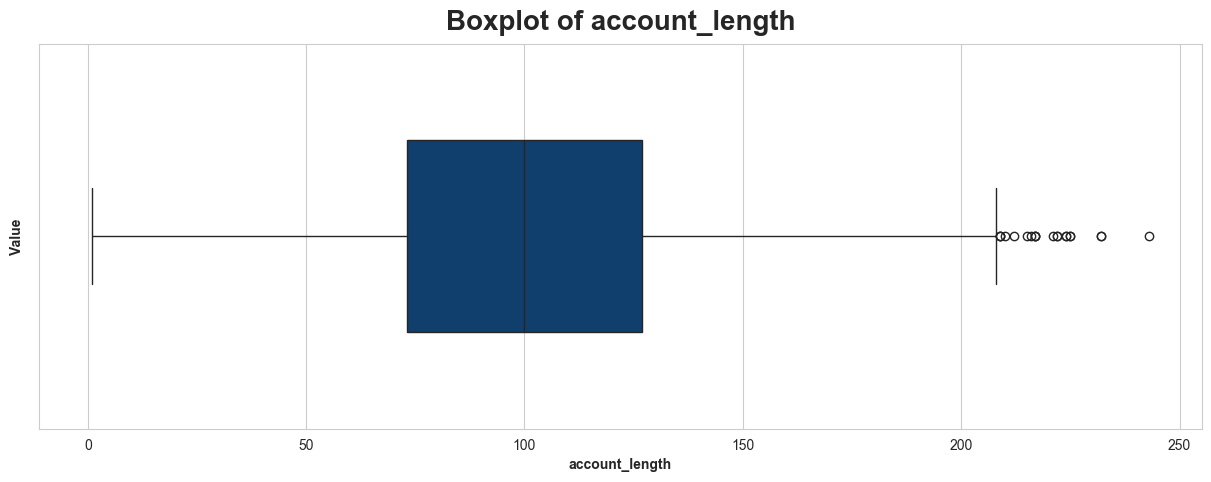

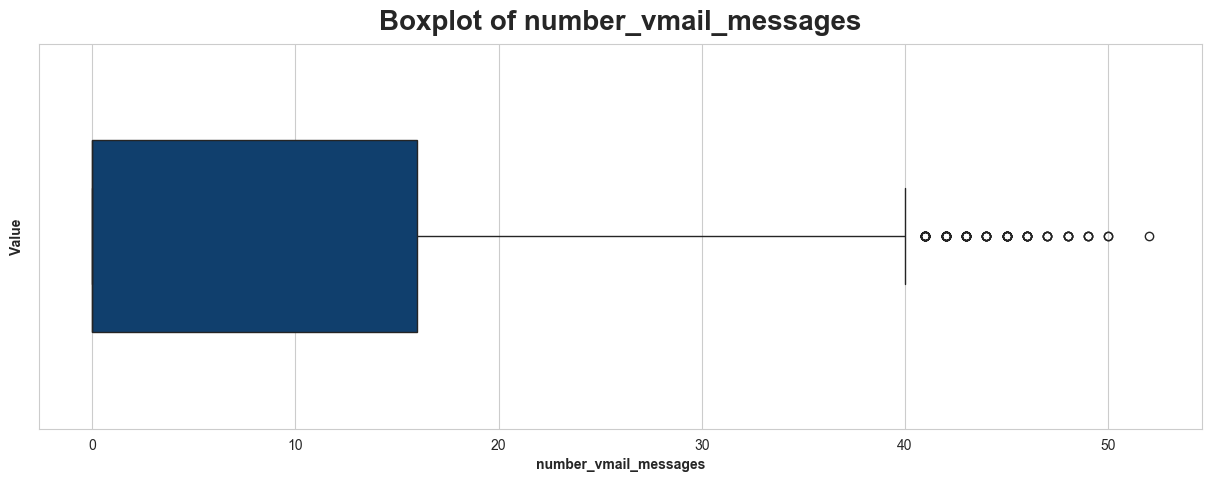

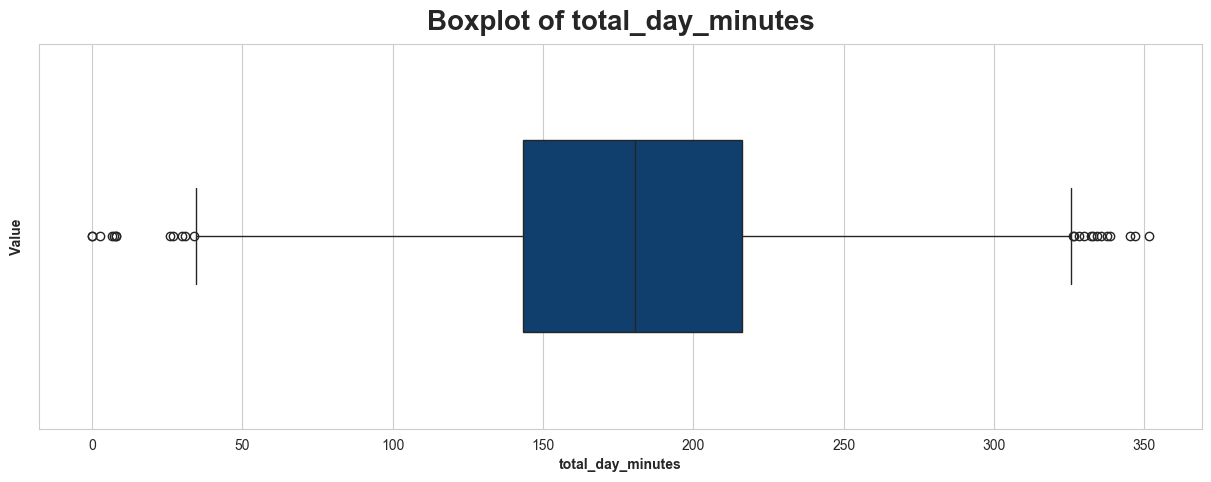

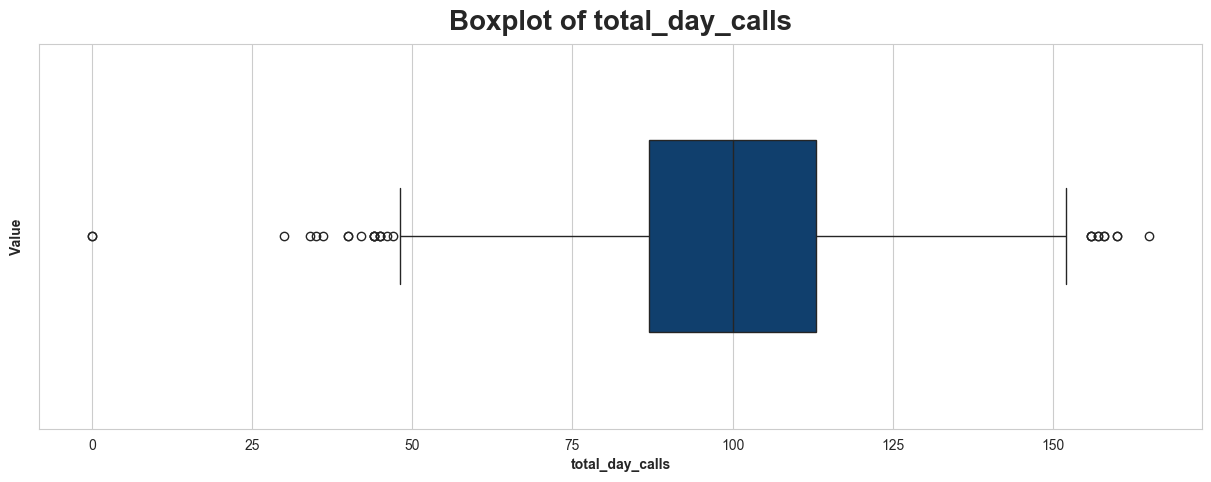

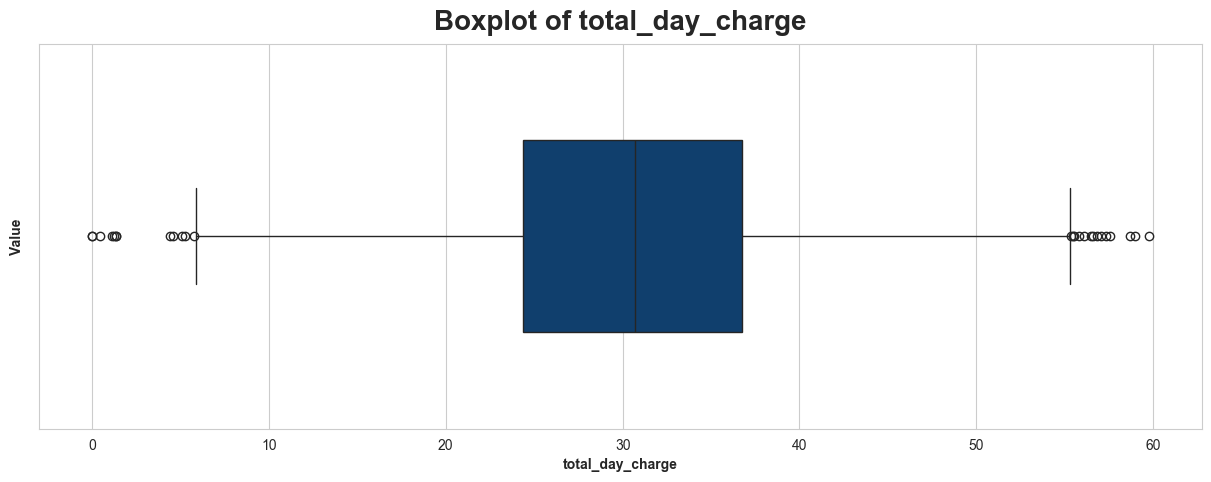

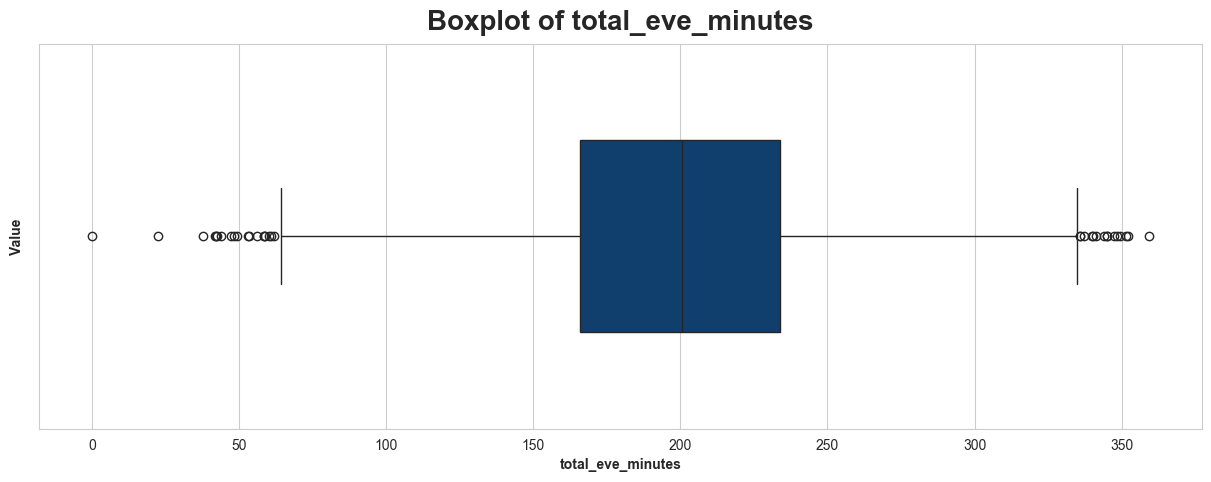

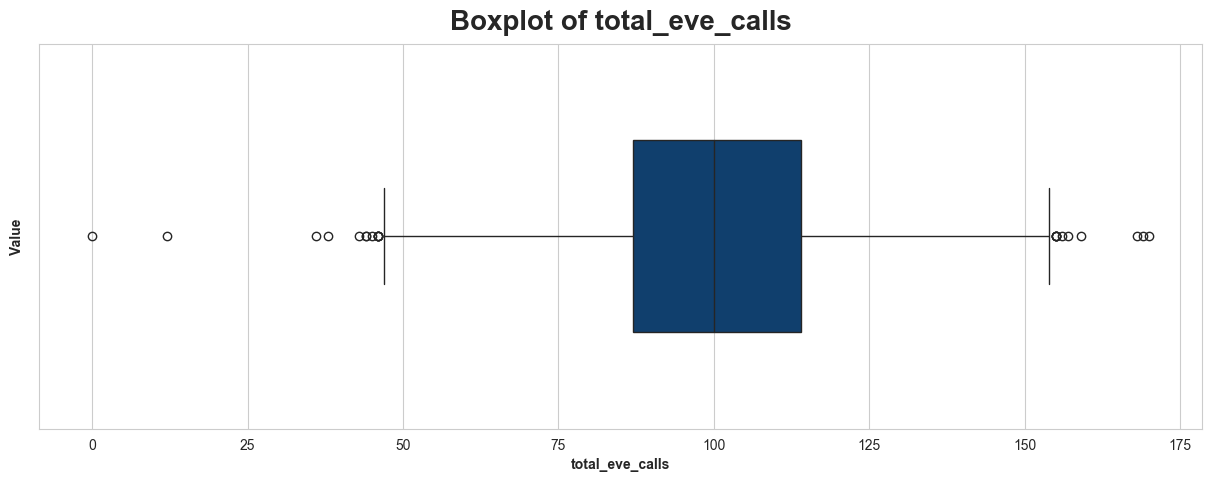

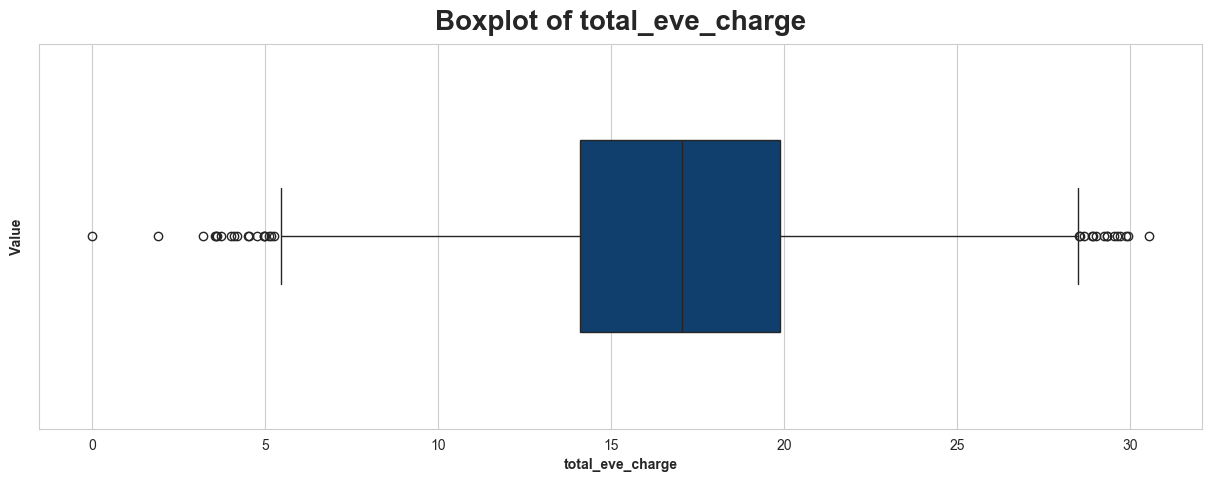

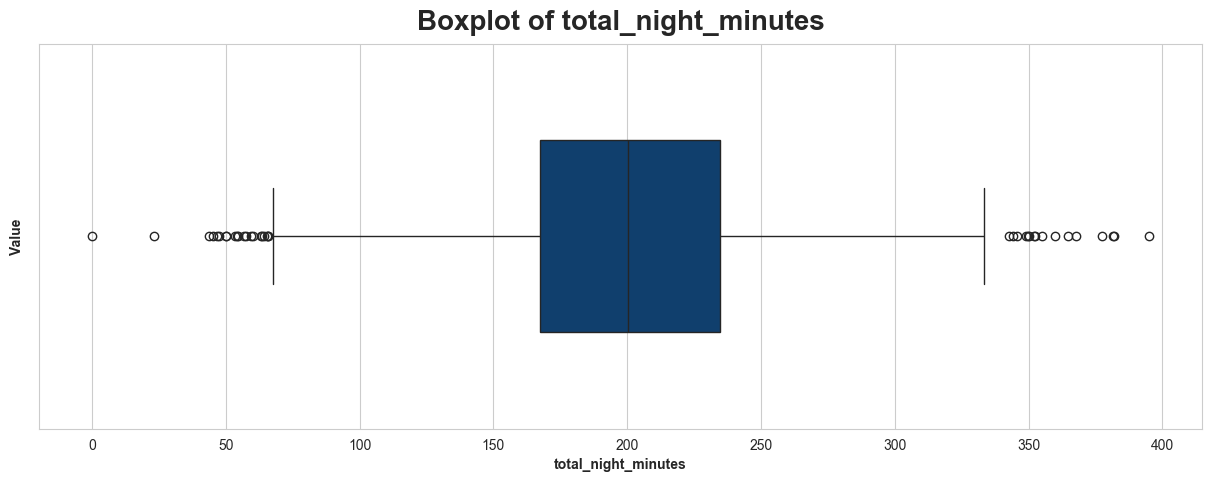

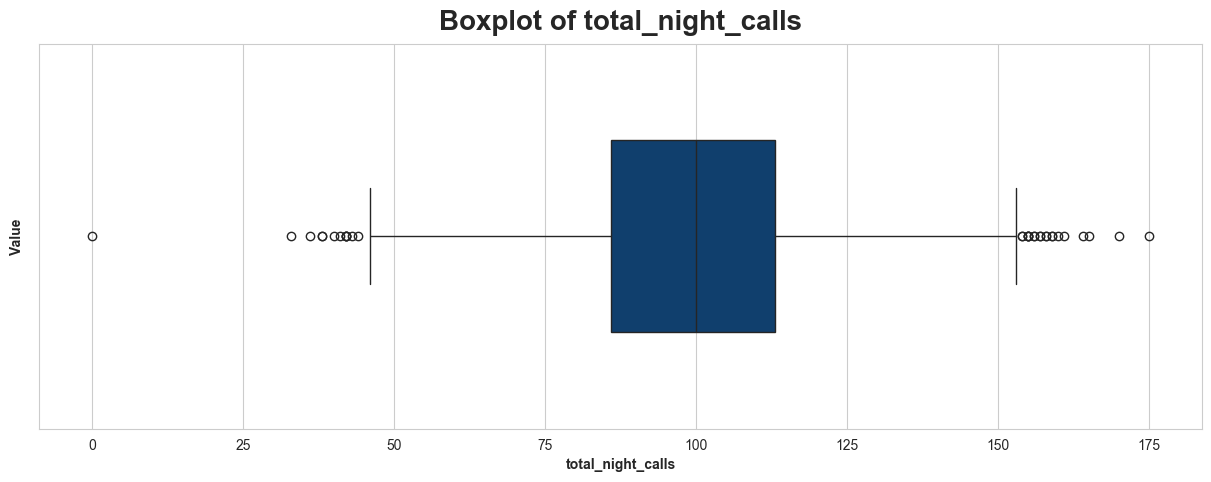

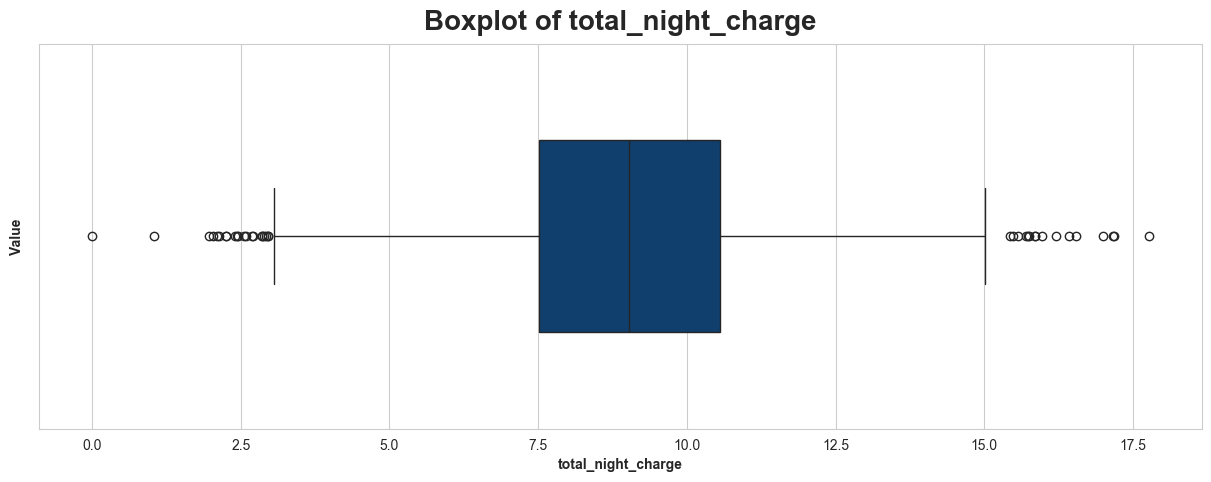

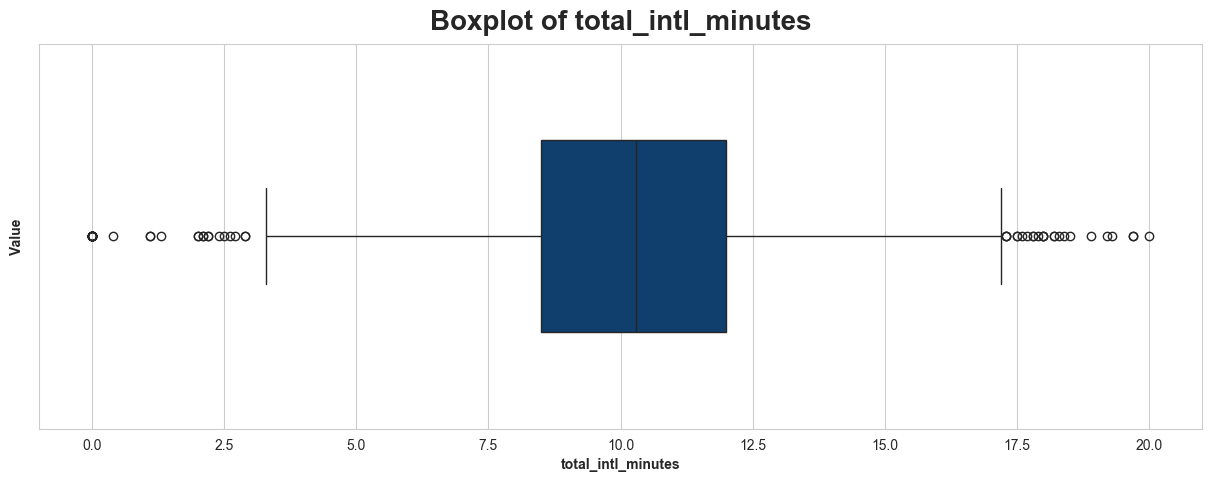

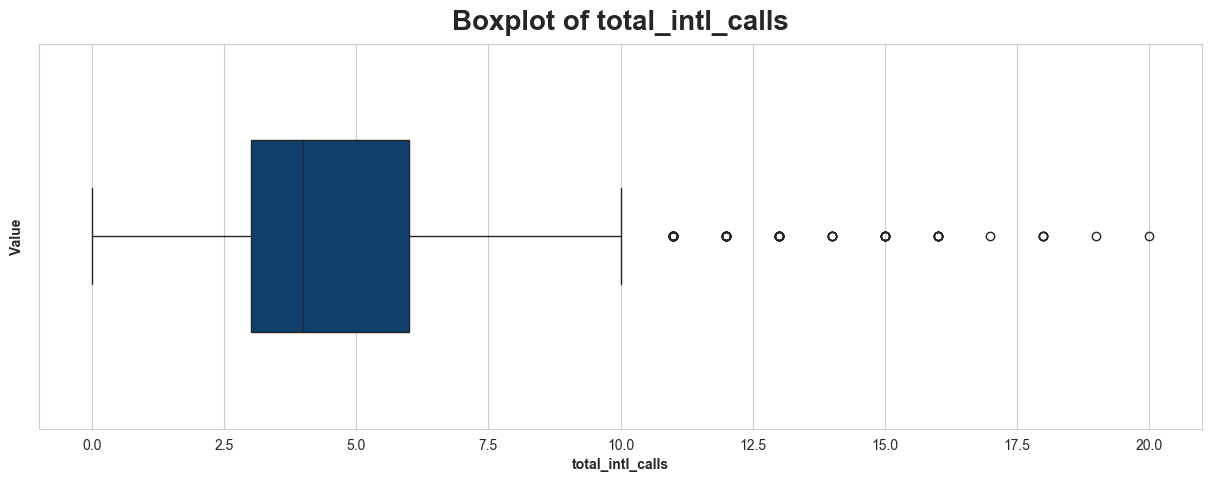

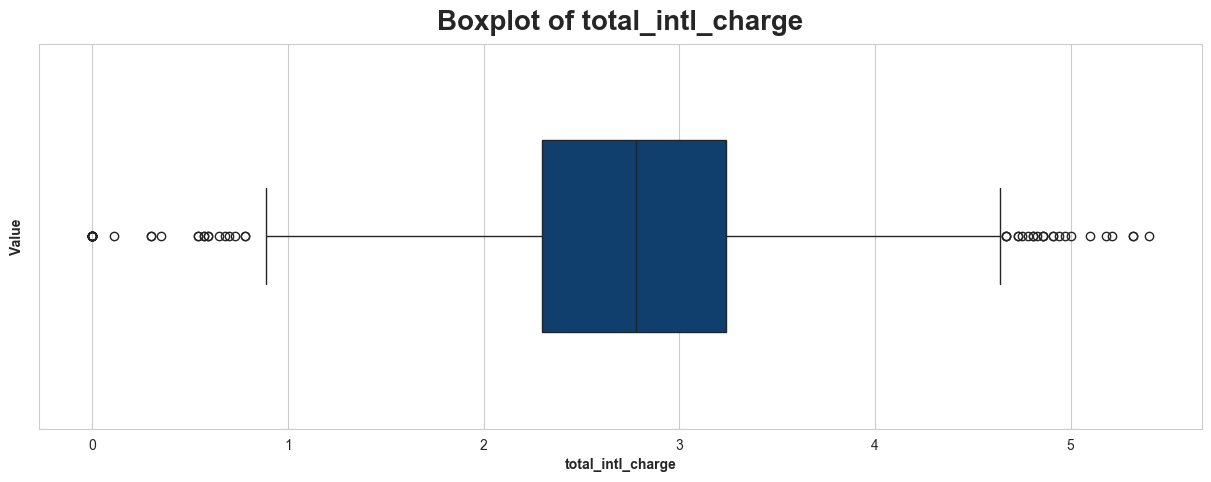

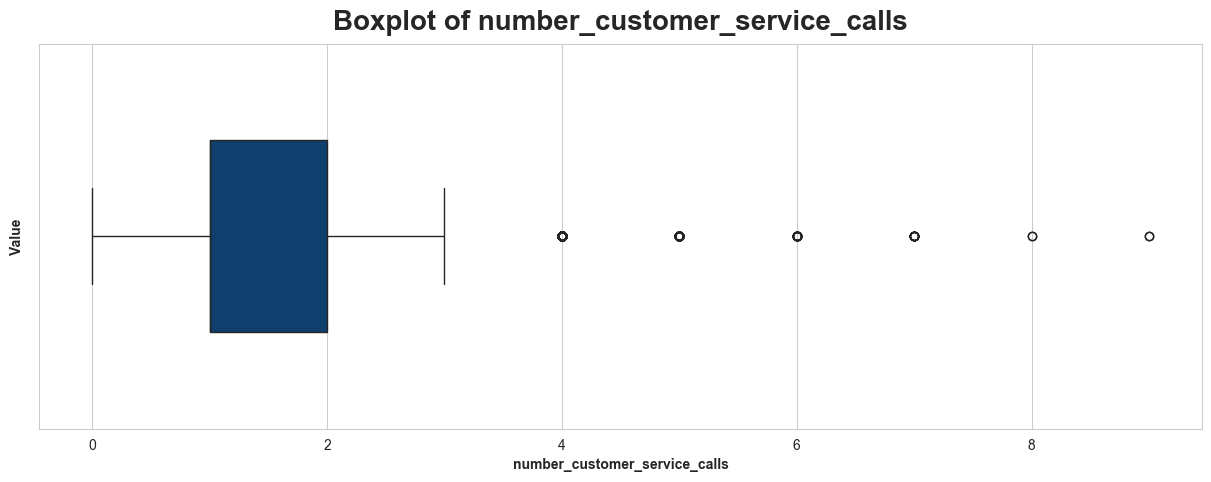

In [581]:
for col in numerical_cols: 
    plt.figure(figsize=(15,5)) 
    sns.boxplot(x=df[col], color=colors[0], width=0.5)
    plt.xlabel(col, fontweight='bold')  
    plt.ylabel('Value', fontweight='bold')  
    plt.title(f'Boxplot of {col}', fontweight='bold', size=20, pad=10)     

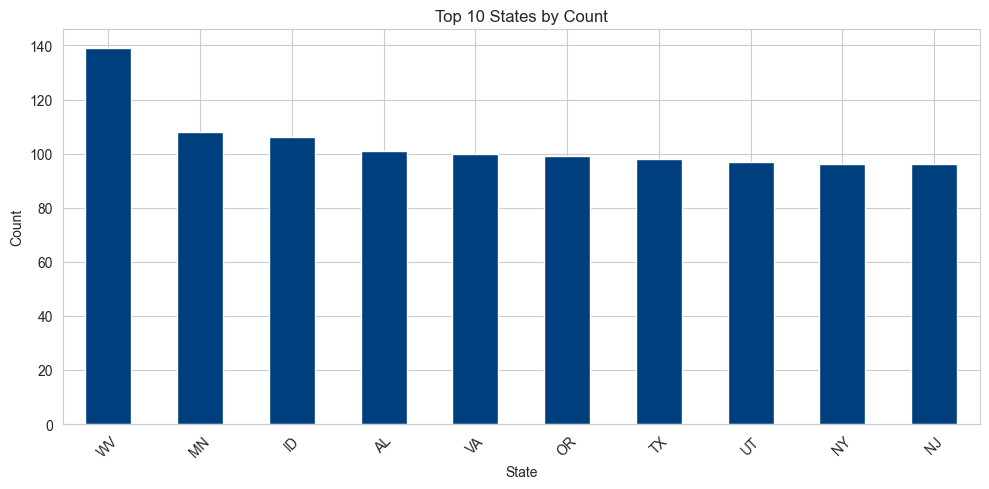

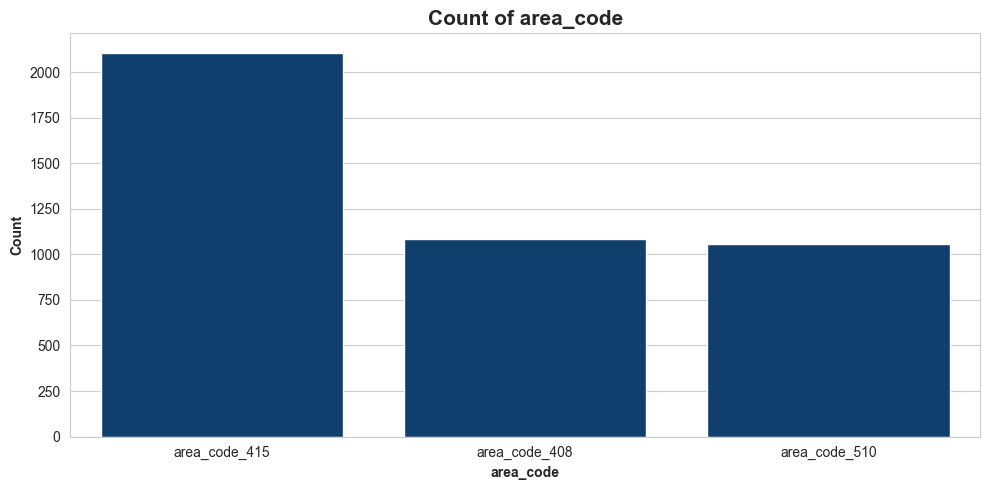

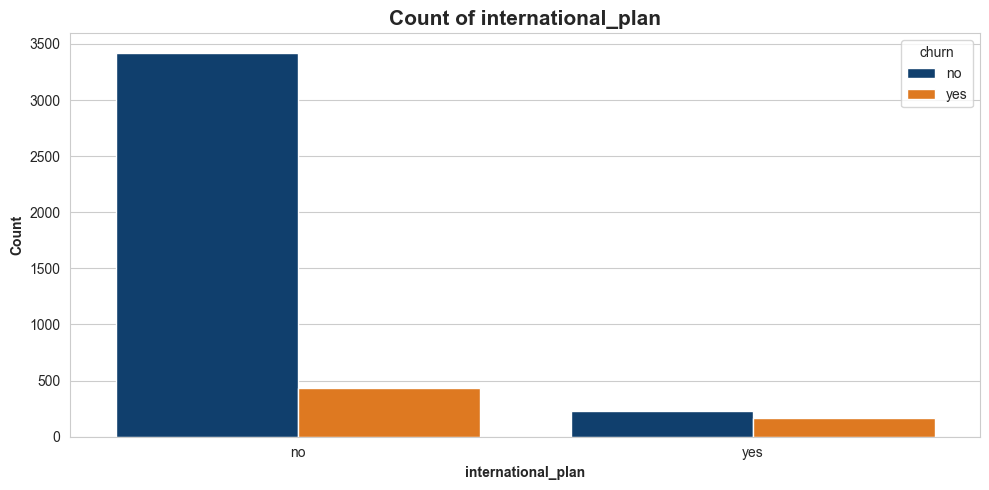

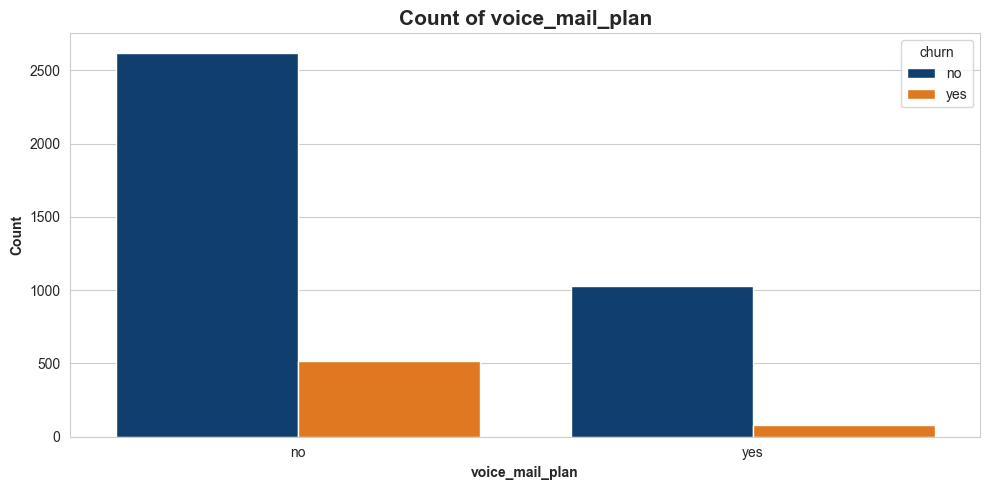

In [582]:
for col in categorical_cols[:-1]:
    if col == 'state': 
        plt.figure(figsize=(10,5))
        state_counts = df['state'].value_counts()
        top_states = state_counts.nlargest(10)
        top_states.plot(kind='bar', color=colors[0])
        plt.title('Top 10 States by Count')
        plt.xlabel('State')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    elif col == 'area_code': 
        plt.figure(figsize=(10,5))
        sns.countplot(x=col, data=df, order=df[col].value_counts().index, color=colors[0])
        plt.xlabel(col, fontweight='bold')
        plt.ylabel('Count', fontweight='bold')
        plt.title(f'Count of {col}', fontweight='bold', size=15)
        plt.tight_layout()
        plt.show()
    else: 
        plt.figure(figsize=(10,5))
        sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette=colors, hue='churn')
        plt.xlabel(col, fontweight='bold')
        plt.ylabel('Count', fontweight='bold')
        plt.title(f'Count of {col}', fontweight='bold', size=15)
        plt.tight_layout()
        plt.show()

West Virginia (WV) has the highest number of customers for the company, particularly in area code 415. Most of these customers do not have an international plan or a voicemail plan.

### **2. Bivariate analysis**

#### **2.1 Analysis with Numerical Features and Churn**

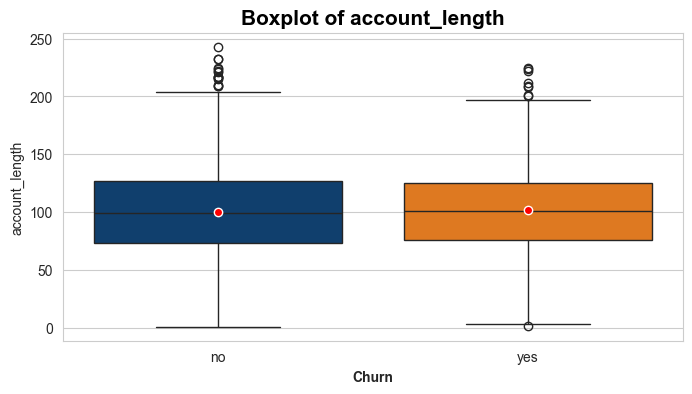

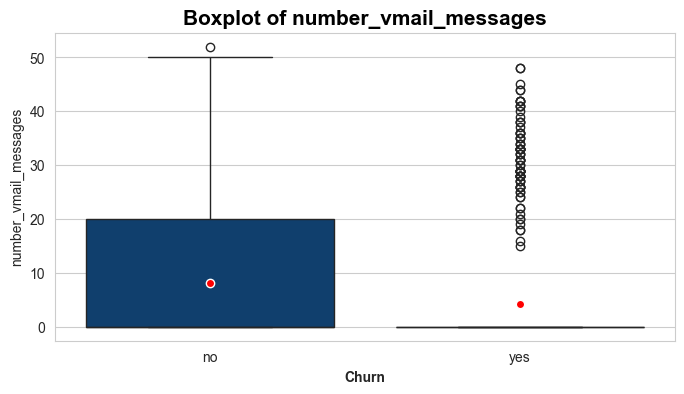

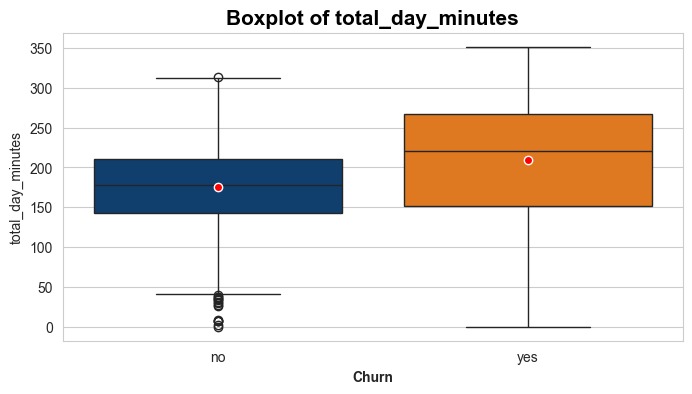

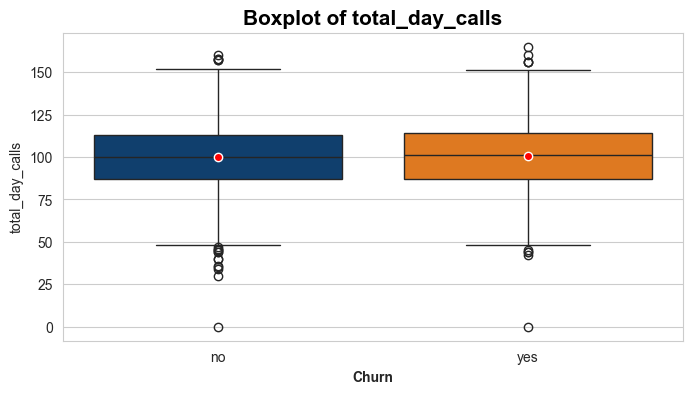

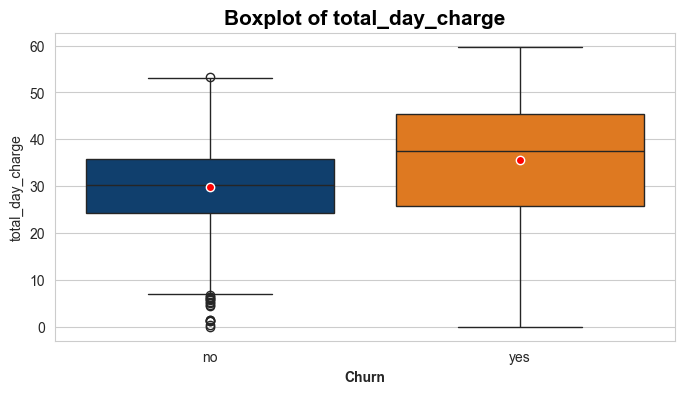

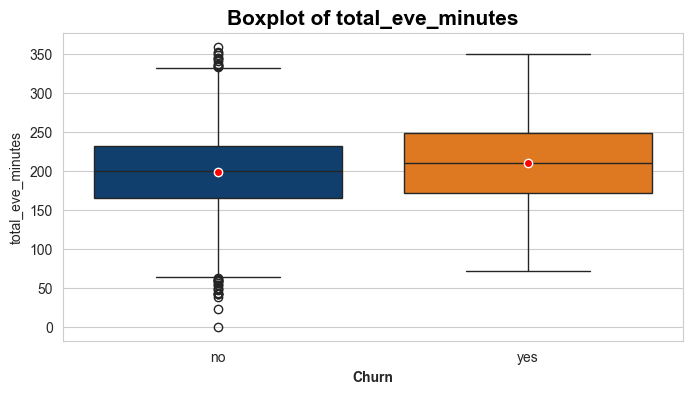

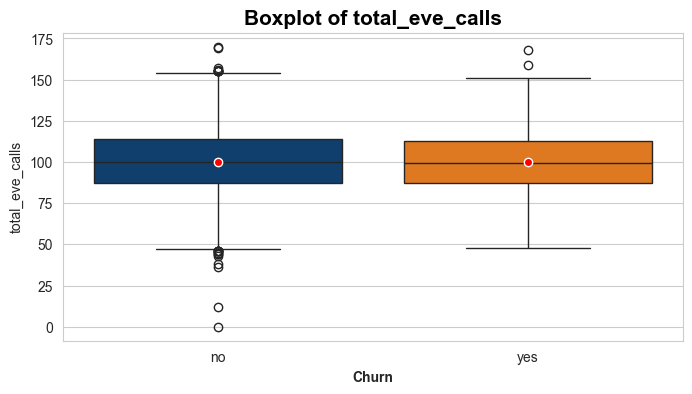

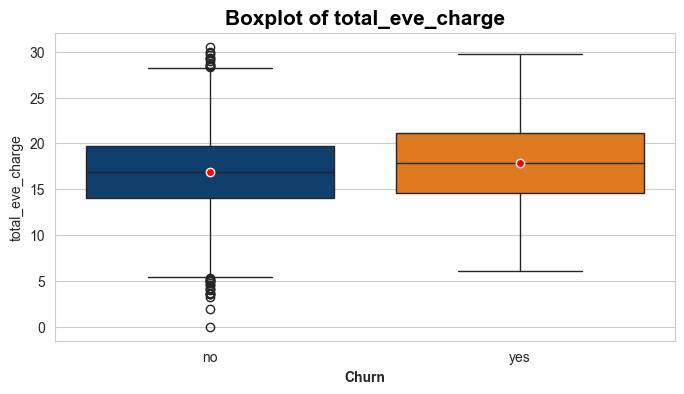

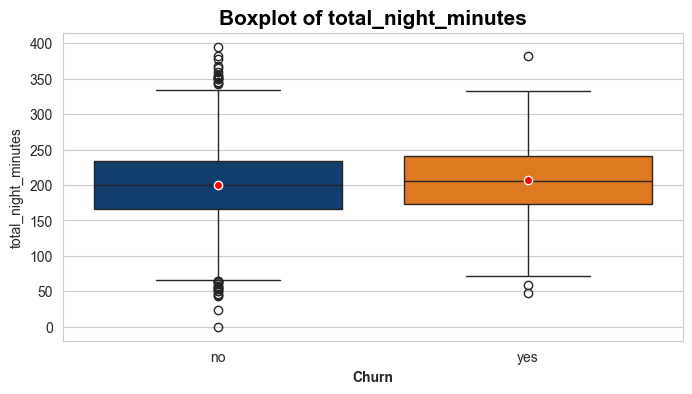

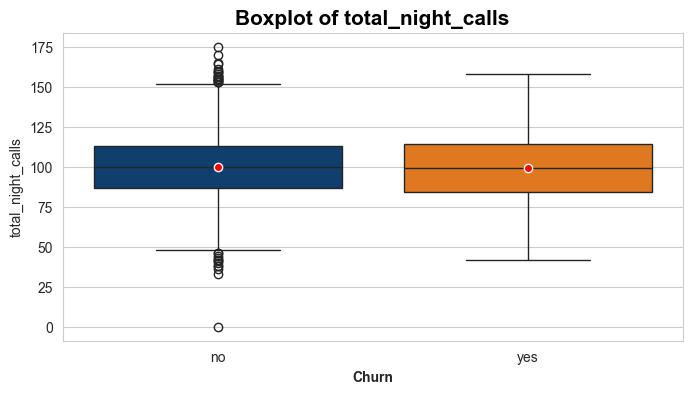

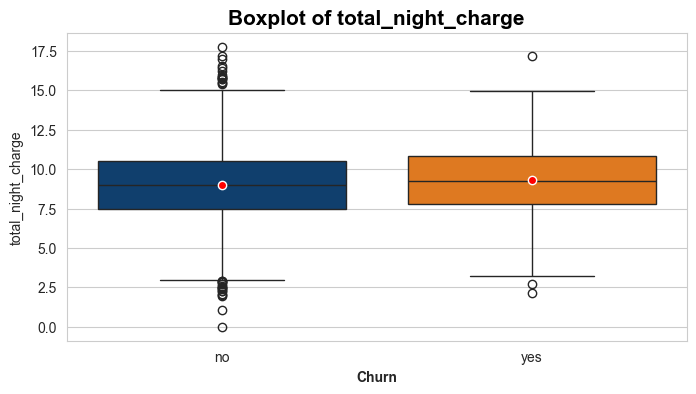

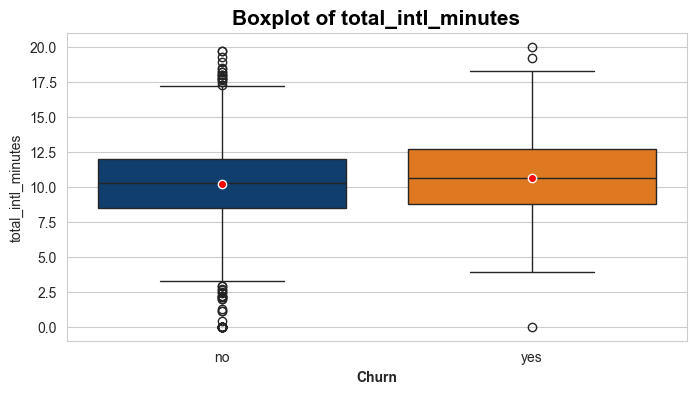

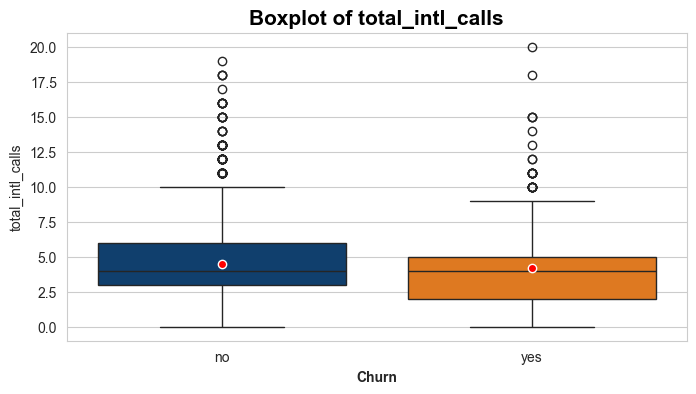

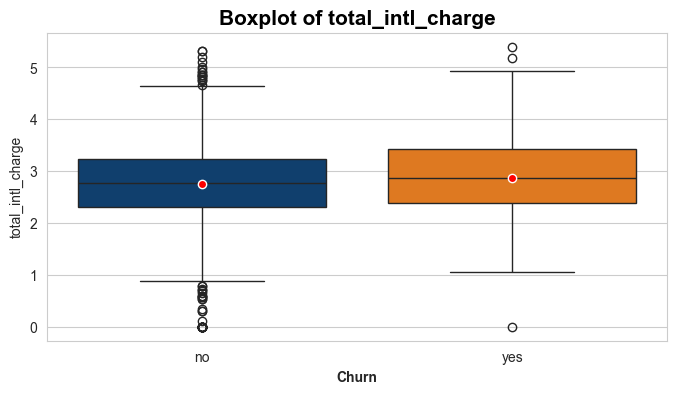

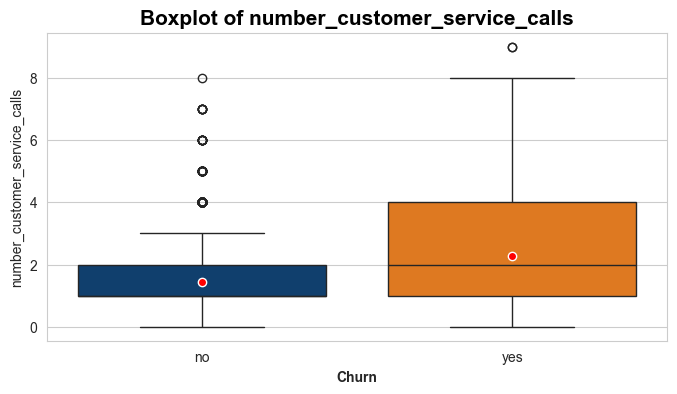

In [583]:
for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(
        data=df,
        x='churn',
        y=col,  
        showmeans=True,
        meanprops={"marker": "o", "markerfacecolor": "red", "markeredgecolor": "white"},
        palette=colors,
        hue='churn'
    )
    plt.xlabel("Churn", fontweight='bold')
    plt.title(f'Boxplot of {col}', fontweight='bold', size=15, color='black')
    plt.show()

- Number of Voicemail Messages: The boxplot shows an interesting pattern. Customers who stay tend to use voicemail more frequently than those who leave, with most departing customers using few or no voicemail messages. However, there are still some high-voicemail users among the departing group.

- Total Day Minutes: Departing customers tend to have longer day call durations than those who stay. This could suggest a potential issue with call quality or customer satisfaction during longer calls.

- Total Day Charge: Departing customers incur higher day call charges than those who stay, as they tend to have longer day call durations.

- Total International Calls: Departing customers generally make fewer international calls, although there are outliers who make a high number of calls.

- Number of Customer Service Calls: Departing customers make significantly more customer service calls, with a longer upper whisker on the boxplot, indicating some customers make many calls. This factor appears strongly related to the likelihood of leaving.

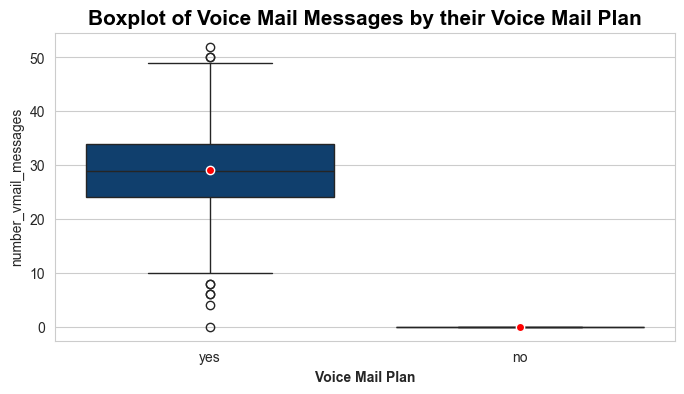

In [584]:
plt.figure(figsize=(8,4))
sns.boxplot(
    data=df,
    x='voice_mail_plan',
    y='number_vmail_messages',  
    showmeans=True,
    meanprops={"marker": "o", "markerfacecolor": "red", "markeredgecolor": "white"},
    color=colors[0],
)
plt.xlabel("Voice Mail Plan", fontweight='bold')
plt.title(f'Boxplot of Voice Mail Messages by their Voice Mail Plan', fontweight='bold', size=15, color='black')
plt.show()

Customers who don’t subscribe to the voicemail plan have no voicemail messages. This indicates a causal relationship between the two, so we should keep only one of these variables. 

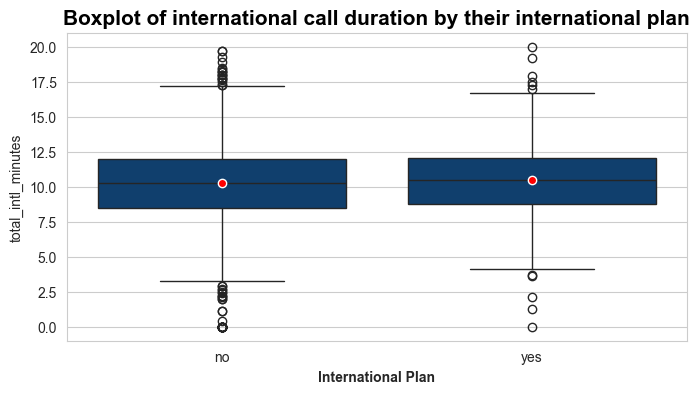

In [585]:
plt.figure(figsize=(8,4))
sns.boxplot(
    data=df,
    x='international_plan',
    y='total_intl_minutes',  
    showmeans=True,
    meanprops={"marker": "o", "markerfacecolor": "red", "markeredgecolor": "white"},
    color=colors[0],
)
plt.xlabel("International Plan", fontweight='bold')
plt.title(f'Boxplot of international call duration by their international plan', fontweight='bold', size=15, color='black')
plt.show()

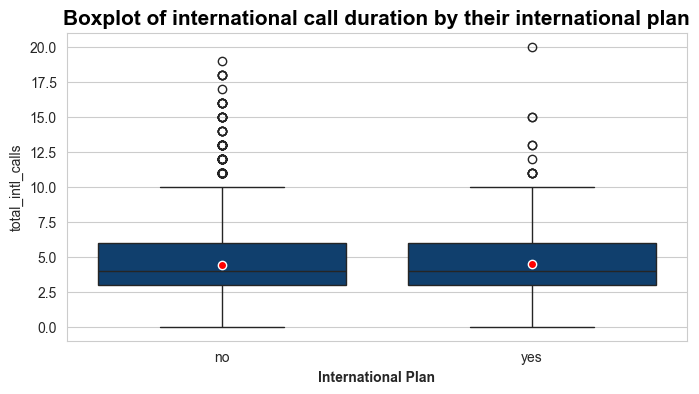

In [586]:
plt.figure(figsize=(8,4))
sns.boxplot(
    data=df,
    x='international_plan',
    y='total_intl_calls',  
    showmeans=True,
    meanprops={"marker": "o", "markerfacecolor": 'red', "markeredgecolor": "white"},
    color=colors[0],
)
plt.xlabel("International Plan", fontweight='bold')
plt.title(f'Boxplot of international call duration by their international plan', fontweight='bold', size=15, color='black')
plt.show()

Not too different between the two. It seems like the register for international plan does not have any association with their call duration or the number of calls they take, which somehow shows that the international plan seems to be ineffective. If it is effective enough, there will be some differentiation between the two.  

#### **2.2 Analysis with Categorical Features and Churn**

In [587]:
# Step 1: Group by state and churn to get the count of 'yes' and 'no'
churn_by_state = df.groupby(['state', 'churn']).size().unstack(fill_value=0)

# Step 2: Calculate the total and churn rate for each state
churn_by_state['Total'] = churn_by_state['yes'] + churn_by_state['no']
churn_by_state['Churn Rate'] = churn_by_state['yes'] / churn_by_state['Total']

# Step 3: Reset the index to turn 'state' into a column for merging
churn_by_state = churn_by_state.reset_index()

# Step 4: Merge churn_by_state with the original df_copy (if needed)
# Here, we don't need to merge with df_copy as we're working directly with churn_by_state.

# Step 5: Create a Plotly choropleth map
fig = px.choropleth(churn_by_state, 
                    locations='state',  # State abbreviation column
                    locationmode="USA-states",  # Use state abbreviations
                    color='Churn Rate',  # Column that contains churn rates
                    color_continuous_scale="Oranges",  # Color scale for churn rates
                    scope="usa",  # Limit map to USA
                    labels={'Churn Rate':'Churn Rate (%)'},  # Label for hover
                    hover_name='state',  # State name on hover
                    title="Churn Rate by State")

# Step 6: Update layout for better display
fig.update_layout(geo=dict(bgcolor='rgba(0,0,0,0)'),
                  title_x=0.5,  # Center the title
                  title_font_size=24)

# Show the map
fig.show()

In [588]:
print(churn_by_state.head())

churn state  no  yes  Total  Churn Rate
0        AK  57    4     61    0.065574
1        AL  88   13    101    0.128713
2        AR  60   11     71    0.154930
3        AZ  70    7     77    0.090909
4        CA  29   10     39    0.256410


In [589]:
top5_highest_churn = churn_by_state.sort_values('Churn Rate', ascending=False).head(5)
print(top5_highest_churn)

churn state  no  yes  Total  Churn Rate
31       NJ  70   26     96    0.270833
4        CA  29   10     39    0.256410
47       WA  62   18     80    0.225000
20       MD  67   19     86    0.220930
26       MT  63   17     80    0.212500


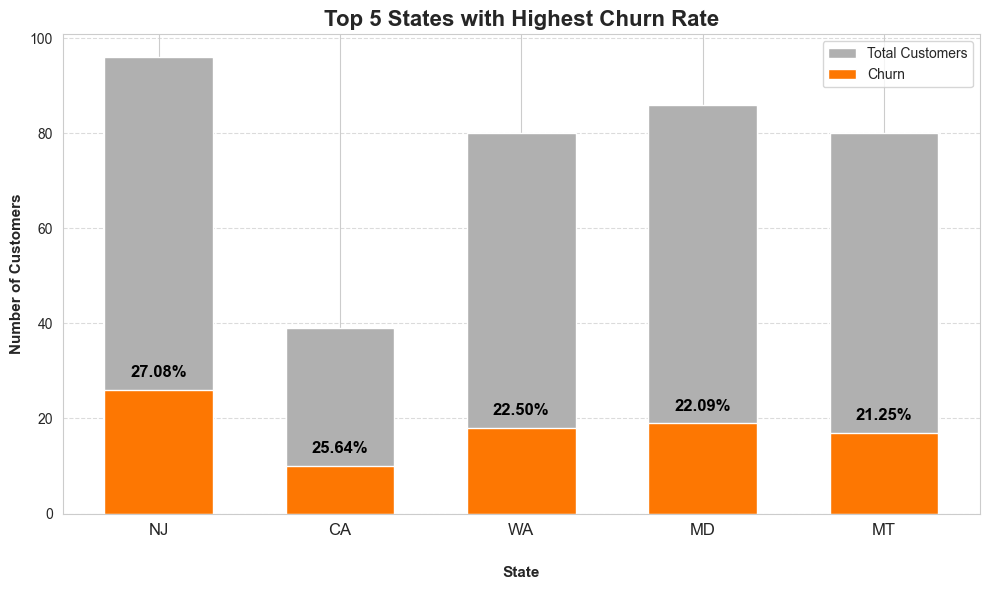

In [590]:
top5_highest_churn = churn_by_state.sort_values('Churn Rate', ascending=False).head(5)
top5_highest_churn_state = top5_highest_churn['state']
top5_highest_churn_total = top5_highest_churn['Total']
top5_highest_churn_churn = top5_highest_churn['yes']
top5_highest_churn_rate = top5_highest_churn['Churn Rate']

# Plotting
plt.figure(figsize=(10, 6))
bar_width = 0.6

# Plot total customers
plt.bar(top5_highest_churn_state, top5_highest_churn_total, color='#b0b0b0', label='Total Customers', width=bar_width)

# Plot churn customers
plt.bar(top5_highest_churn_state, top5_highest_churn_churn, color=colors[1], label='Churn', width=bar_width)

# Add labels to the bars
for index, row in top5_highest_churn.iterrows():
    plt.text(row['state'], row['yes'] + 2, f"{row['Churn Rate'] * 100:.2f}%", 
             ha="center", va="bottom", fontsize=12, fontweight="bold", color='black')

# Customize axes and title
plt.title("Top 5 States with Highest Churn Rate", fontweight="bold", size=16)
plt.ylabel("Number of Customers", fontsize=11, fontweight="bold")
plt.xlabel("State", labelpad=20, fontsize=11, fontweight="bold")
plt.xticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

The top five states with the highest churn rates are NJ and CA, which are significantly higher than other states. WA, MD, and MT also have relatively high churn rates, ranging from 21% to 23%.

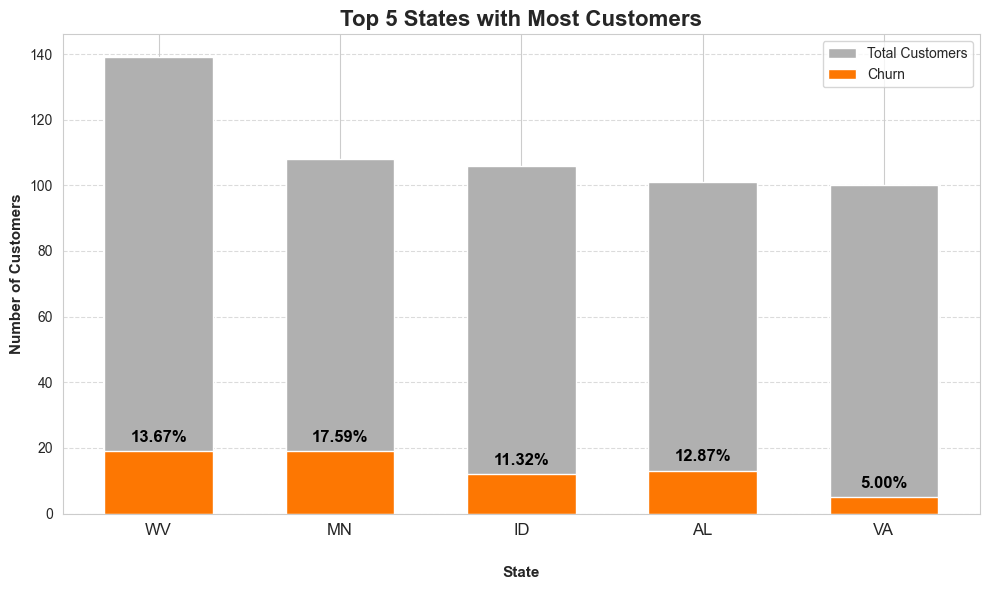

In [591]:
top5_most_customer = churn_by_state.sort_values('Total', ascending=False).head(5)
top5_most_customer_state = top5_most_customer['state']
top5_most_customer_total = top5_most_customer['Total']
top5_most_customer_churn = top5_most_customer['yes']
top5_most_customer_rate = top5_most_customer['Churn Rate']

# Plotting
plt.figure(figsize=(10, 6))
bar_width = 0.6

# Plot total customers
plt.bar(top5_most_customer_state, top5_most_customer_total, color='#b0b0b0', label='Total Customers', width=bar_width)

# Plot churn customers
plt.bar(top5_most_customer_state, top5_most_customer_churn, color=colors[1], label='Churn', width=bar_width)

# Add labels to the bars
for index, row in top5_most_customer.iterrows():
    plt.text(row['state'], row['yes'] + 2, f"{row['Churn Rate'] * 100:.2f}%", 
             ha="center", va="bottom", fontsize=12, fontweight="bold", color='black')

# Customize axes and title
plt.title("Top 5 States with Most Customers", fontweight="bold", size=16)
plt.ylabel("Number of Customers", fontsize=11, fontweight="bold")
plt.xlabel("State", labelpad=20, fontsize=11, fontweight="bold")
plt.xticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

The states with the largest number of customers generally have low churn rates; only MN has a churn rate above the average, at 17.59%.

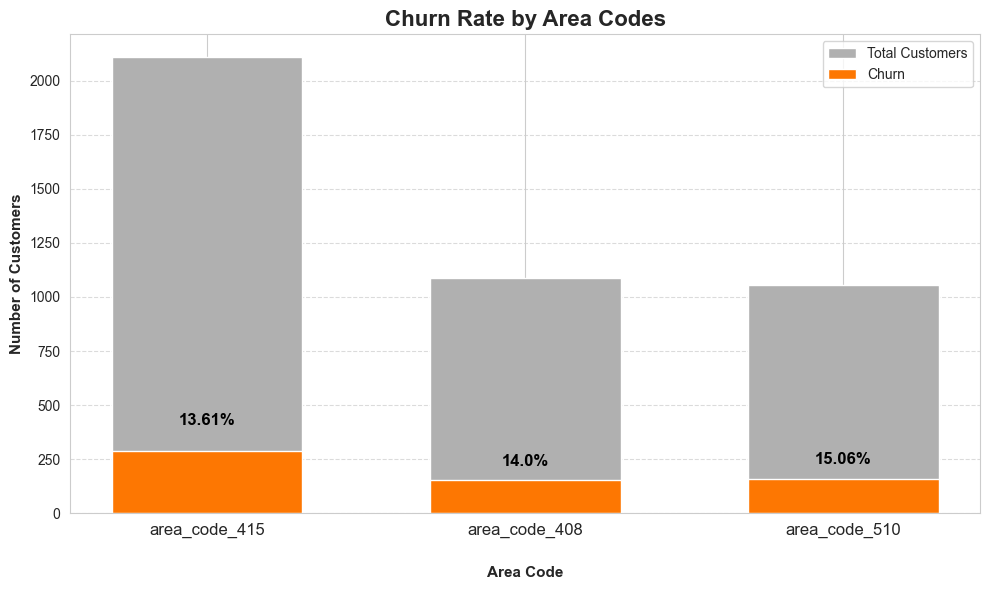

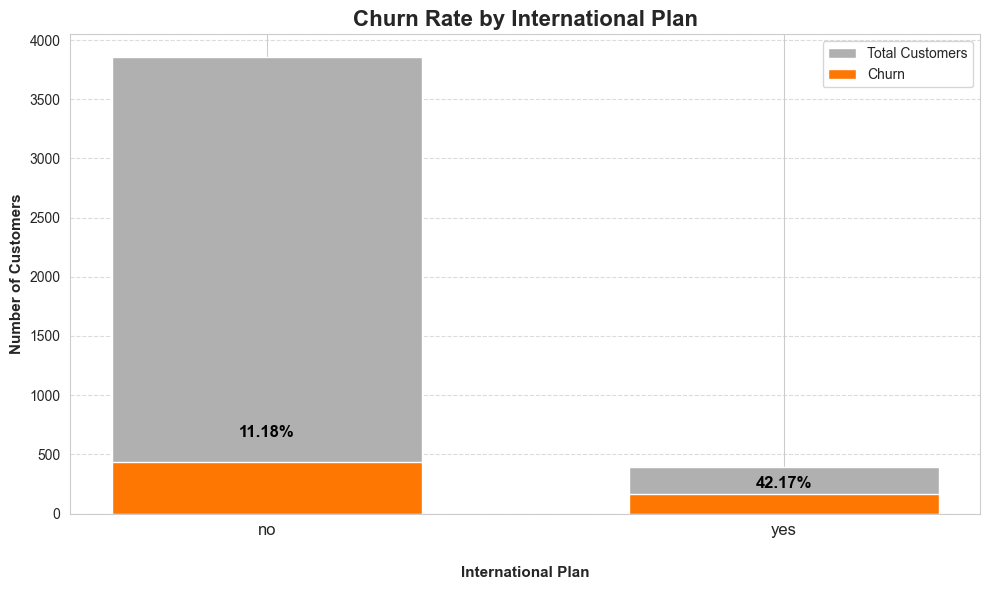

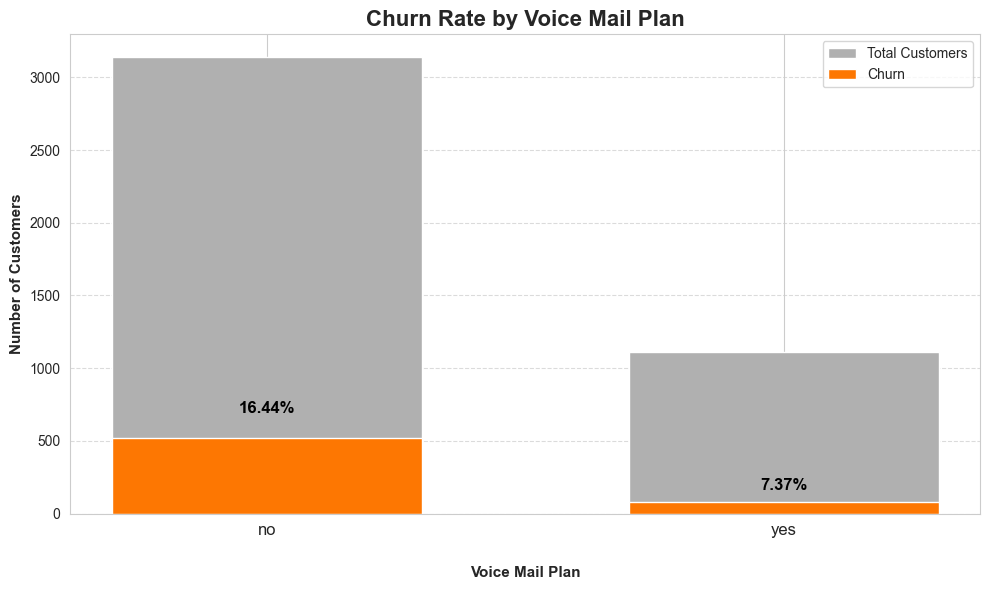

In [592]:
def plot_churn_rate_by_category(df, category, title, xlabel, colors):
    # Calculate total counts and churn counts for the category
    total_counts = df[category].value_counts()
    churn_counts = df[df['churn'] == 'yes'][category].value_counts().reindex(total_counts.index, fill_value=0)
    
    # Calculate churn rate as a percentage
    churn_rate = (churn_counts / total_counts * 100).round(2)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    bar_width = 0.6
    
    # Plot total counts
    plt.bar(total_counts.index, total_counts, color='#b0b0b0', label='Total Customers', width=bar_width)
    
    # Plot churn counts
    plt.bar(total_counts.index, churn_counts, color=colors[1], label='Churn', width=bar_width)
    
    # Add labels to the bars
    for index, (churn_value, rate) in enumerate(zip(churn_counts, churn_rate)):
        plt.text(index, churn_value + total_counts.iloc[index] * 0.05, f"{rate}%",
                 ha="center", va="bottom", size=12, fontweight="bold", color='black')
    
    # Customize axes and title
    plt.title(f"Churn Rate by {title}", fontweight="bold", size=16)
    plt.ylabel("Number of Customers", fontsize=11, fontweight="bold")
    plt.xlabel(xlabel, labelpad=20, fontsize=11, fontweight="bold")
    plt.xticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add legend
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

# Plot churn rates for each category
plot_churn_rate_by_category(df, 'area_code', 'Area Codes', 'Area Code', colors=colors)
plot_churn_rate_by_category(df, 'international_plan', 'International Plan', 'International Plan', colors=colors)
plot_churn_rate_by_category(df, 'voice_mail_plan', 'Voice Mail Plan', 'Voice Mail Plan', colors=colors)

Most customers of this telecom provider do not have an international plan. However, the results show that nearly half of those with an international plan eventually churn. This suggests that customers with an international plan are more likely to leave, which indicates a need for further examination

Most customers lack a voicemail plan, yet those without it have a higher churn rate (16.44%) compared to those with the plan (7.37%). This suggests that offering a voicemail plan could be an effective retention strategy for the company.

## **2.3 Multivariate Analysis**

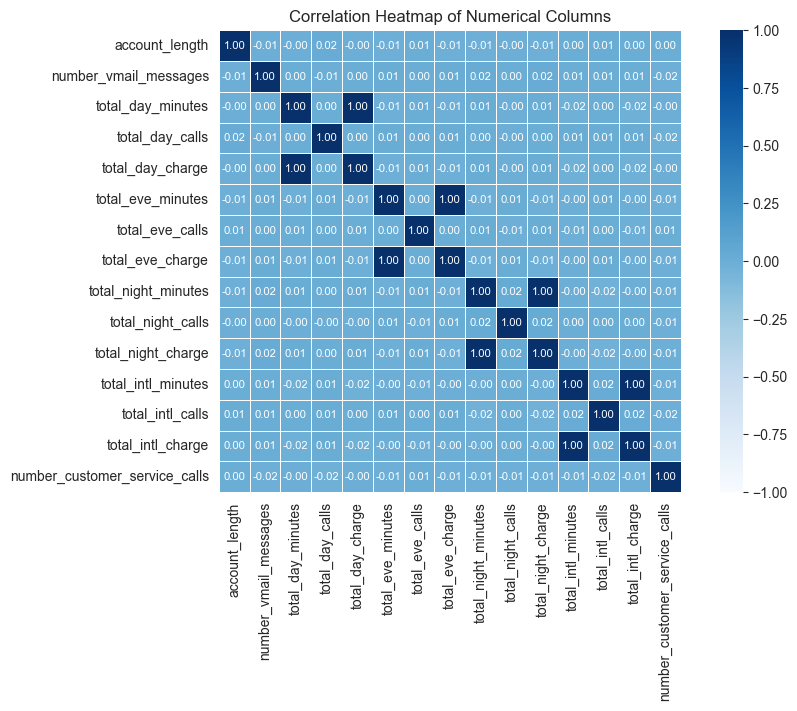

In [593]:
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', vmin=-1, vmax=1, square=True,
            linewidths=.5, annot_kws={"size": 8}, fmt=".2f")
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()

Columns related to total charging should be removed, as they are perfectly correlated with the duration of customer calls.

## **IV. Feature Selection**

In [594]:
df.drop(columns=['total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge'], inplace=True)
numerical_cols = df.select_dtypes(include=['float', 'int']).columns

# Separate target and features
target = df['churn']

# Do Fisher score for them
def fisher_score(X, y):
    fisher_scores = {}
    # overall mean of each feature 
    overall_mean = X.mean(axis='index')
    # get the unique class
    classes = y.unique()
    # mean of feature in each class
    for col in X.columns:
        numerator = 0
        denominator = 0 
        for c in classes: 
            value_class = X[y == c]
            sample_num = len(value_class)
            mean_class = value_class[col].mean()
            var_class = value_class[col].var()
            numerator += sample_num * ((mean_class - overall_mean[col]) ** 2)
            denominator += sample_num * var_class 
        fisher_scores[col] = numerator / denominator if denominator != 0 else 0.
    fisher_scores = pd.Series(fisher_scores)
    fisher_scores = fisher_scores.sort_values(ascending=False)
    return fisher_scores 

fisher_score_churn = fisher_score(df[numerical_cols], target)
print(f'Fisher scores are:')
print(fisher_score_churn)

Fisher scores are:
number_customer_service_calls    0.051422
total_day_minutes                0.048564
number_vmail_messages            0.010168
total_eve_minutes                0.006254
total_intl_minutes               0.003053
total_night_minutes              0.002180
total_intl_calls                 0.001180
account_length                   0.000375
total_night_calls                0.000161
total_day_calls                  0.000135
total_eve_calls                  0.000046
dtype: float64


### **Statistical Analysis**

In [595]:
# Chi-square test
chi2_results = {}

# Perform chi-square test for each categorical column
for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], target)
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    chi2_results[col] = {'chi2': chi2, 'p-value': round(p, 4)}

# Convert results to DataFrame for better readability
chi2_df = pd.DataFrame(chi2_results).T

# Sort by p-value and then by chi2 in descending order
chi2_df = chi2_df.sort_values(by=['p-value', 'chi2'], ascending=[True, False])

print("\nChi-Square Feature Selection Results (Categorical):")
print(chi2_df)


Chi-Square Feature Selection Results (Categorical):
                           chi2  p-value
churn               4241.733255   0.0000
international_plan   282.653490   0.0000
voice_mail_plan       55.109814   0.0000
state                 85.993673   0.0012
area_code              1.216654   0.5443


Based on the results, I will choose top 3 with highest fisher scores numerical columns and 2 categorical columns (international_plan and state) as features for the model. 

## **V. Modeling**

### **1. Data Preprocessing**

In [596]:
# 1. Drop unimportant features
df = df.drop(columns=['area_code', 'voice_mail_plan', 'total_day_calls', 'total_eve_calls', 'total_night_calls', 
                      'total_night_minutes', 'total_eve_minutes', 'total_intl_calls', 'total_intl_minutes', 'account_length'])

# 2. Encode categorical variables using dummy encoding
categorical_cols_update = df.select_dtypes(include=['object', 'category']).columns
categorical_cols_update = [col for col in categorical_cols_update if col != 'churn']
numerical_cols_update = df.select_dtypes(include=['int64', 'float64']).columns

df = pd.get_dummies(df, columns=categorical_cols_update, drop_first=True)

# 3. Encode the target column
df['churn'] = df['churn'].map({'yes': 1, 'no': 0})

# 4. StandardScaler
scaler = StandardScaler()
df[numerical_cols_update] = scaler.fit_transform(df[numerical_cols_update])

# 4. Split the data into training and test sets
X = df.drop('churn', axis=1)
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 5. Apply SMOTE to the training data to balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# The data is now ready for modeling
X_train = X_train_resampled
y_train = y_train_resampled

### **2. Modeling**

#### **Function to evaluate the results of the models**

In [597]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred)*100:.4f}%")
    print("_______________________________________________")
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print("_______________________________________________")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("\nTESTING RESULTS: \n===============================================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred)*100:.4f}%")
    print("_______________________________________________")
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print("_______________________________________________")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

#### **Function to visualize the confusion matrix**

In [598]:
def plot_confusion_matrix(y_actual, y_pred, model_name): 
    cm = confusion_matrix(y_actual, y_pred)
    # Create the plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='.0f', cmap='Oranges')
    plt.title(f'Confusion matrix for {model_name}', fontweight='bold', fontsize=15)
    plt.xlabel('Predicted', fontweight='bold', fontsize=12)
    plt.ylabel('Actual', fontweight='bold', fontsize=12)
    plt.show()

#### **2.1 Decision Tree**

In [599]:
a = 120/730
weight = {0: a, 1:1}
tree_clf = DecisionTreeClassifier(random_state=42, class_weight=weight)
tree_clf.fit(X_train, y_train)

# Evaluate
evaluate(tree_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
ACCURACY SCORE:
100.0000%
_______________________________________________
CONFUSION MATRIX:
[[2922    0]
 [   0 2922]]
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    2922.0  2922.0       1.0     5844.0        5844.0

TESTING RESULTS: 
ACCURACY SCORE:
82.1176%
_______________________________________________
CONFUSION MATRIX:
[[627 103]
 [ 49  71]]
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.927515    0.408046  0.821176    0.667780      0.854178
recall       0.858904    0.591667  0.821176    0.725285      0.821176
f1-score     0.891892    0.482993  0.821176    0.687443      0.834165
sup

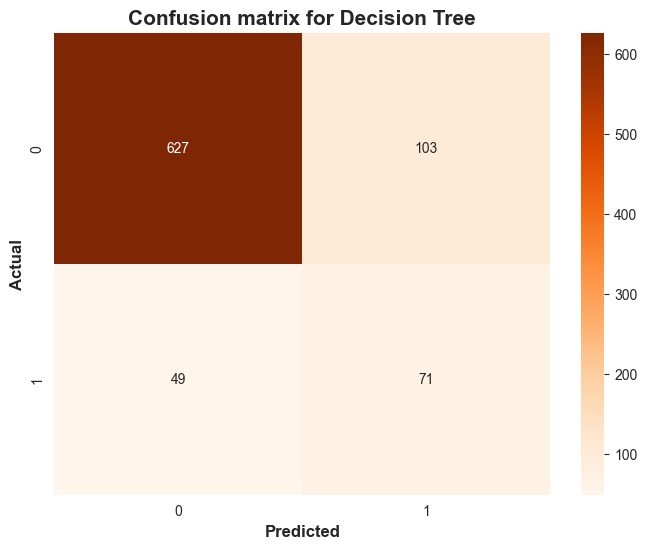

In [600]:
# Visualize confusion matrix 
y_pred_tree = tree_clf.predict(X_test)
plot_confusion_matrix(y_test, y_pred_tree, 'Decision Tree')

#### **2.2 Logistic Regression**

In [612]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

# Evaluate
evaluate(lr_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
ACCURACY SCORE:
85.6947%
_______________________________________________
CONFUSION MATRIX:
[[2544  378]
 [ 458 2464]]
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.847435     0.866995  0.856947     0.857215      0.857215
recall        0.870637     0.843258  0.856947     0.856947      0.856947
f1-score      0.858879     0.854962  0.856947     0.856920      0.856920
support    2922.000000  2922.000000  0.856947  5844.000000   5844.000000

TESTING RESULTS: 
ACCURACY SCORE:
81.0588%
_______________________________________________
CONFUSION MATRIX:
[[622 108]
 [ 53  67]]
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.921481    0.382857  0.810588    0.652169      0.845440
recall       0.852055    0.558333  0.810588    0.705194      0.810588
f1-score     0

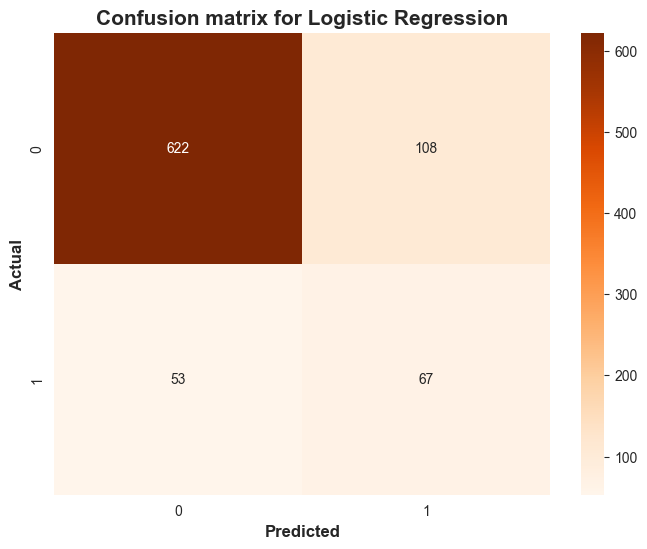

In [602]:
# Visualize confusion matrix 
y_pred_lr = lr_clf.predict(X_test)
plot_confusion_matrix(y_test, y_pred_lr, 'Logistic Regression')

#### **2.3 Random Forest**

In [603]:
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

# Evaluate
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
ACCURACY SCORE:
100.0000%
_______________________________________________
CONFUSION MATRIX:
[[2922    0]
 [   0 2922]]
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    2922.0  2922.0       1.0     5844.0        5844.0

TESTING RESULTS: 
ACCURACY SCORE:
86.9412%
_______________________________________________
CONFUSION MATRIX:
[[669  61]
 [ 50  70]]
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.930459    0.534351  0.869412    0.732405      0.874538
recall       0.916438    0.583333  0.869412    0.749886      0.869412
f1-score     0.923395    0.557769  0.869412    0.740582      0.871778
sup

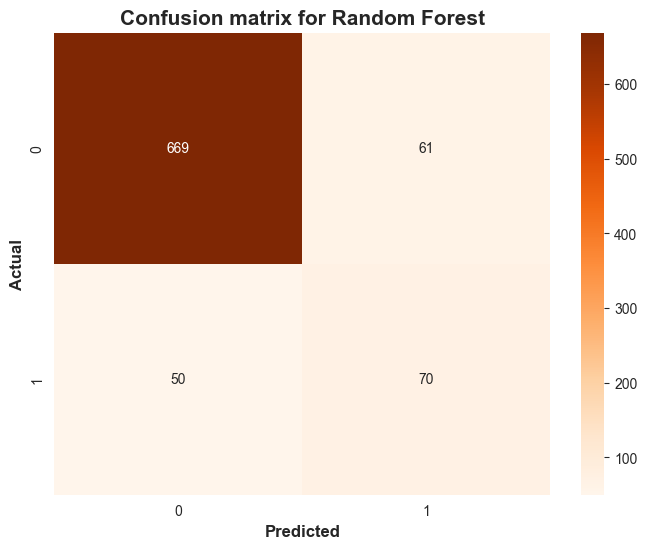

In [604]:
# Visualize confusion matrix 
y_pred_rf = rf_clf.predict(X_test)
plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest')

#### **2.4 K-Nearest Neighbors**

In [605]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
# Evaluate
evaluate(knn, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
ACCURACY SCORE:
95.0376%
_______________________________________________
CONFUSION MATRIX:
[[2729  193]
 [  97 2825]]
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.965676     0.936050  0.950376     0.950863      0.950863
recall        0.933949     0.966804  0.950376     0.950376      0.950376
f1-score      0.949548     0.951178  0.950376     0.950363      0.950363
support    2922.000000  2922.000000  0.950376  5844.000000   5844.000000

TESTING RESULTS: 
ACCURACY SCORE:
84.3529%
_______________________________________________
CONFUSION MATRIX:
[[662  68]
 [ 65  55]]
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.910591    0.447154  0.843529    0.678873      0.845165
recall       0.906849    0.458333  0.843529    0.682591      0.843529
f1-score     0

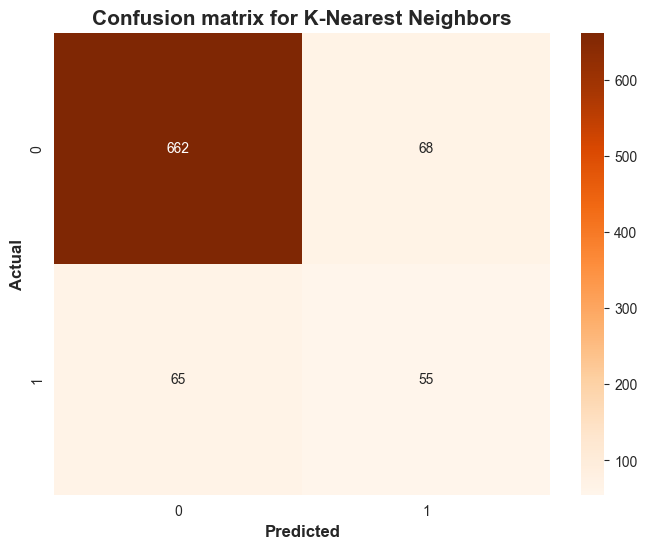

In [606]:
# Visualize confusion matrix 
y_pred_knn = knn.predict(X_test)
plot_confusion_matrix(y_test, y_pred_knn, 'K-Nearest Neighbors')

#### **2.5 Support Vector Machine**

In [607]:
svm = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)  # Adjust kernel and parameters as needed
svm.fit(X_train, y_train)
# Evaluate
evaluate(svm, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
ACCURACY SCORE:
93.1554%
_______________________________________________
CONFUSION MATRIX:
[[2700  222]
 [ 178 2744]]
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.938151     0.925152  0.931554     0.931652      0.931652
recall        0.924025     0.939083  0.931554     0.931554      0.931554
f1-score      0.931034     0.932065  0.931554     0.931550      0.931550
support    2922.000000  2922.000000  0.931554  5844.000000   5844.000000

TESTING RESULTS: 
ACCURACY SCORE:
87.2941%
_______________________________________________
CONFUSION MATRIX:
[[661  69]
 [ 39  81]]
_______________________________________________
CLASSIFICATION REPORT:
                    0        1  accuracy   macro avg  weighted avg
precision    0.944286    0.540  0.872941    0.742143      0.887210
recall       0.905479    0.675  0.872941    0.790240      0.872941
f1-score     0.924476  

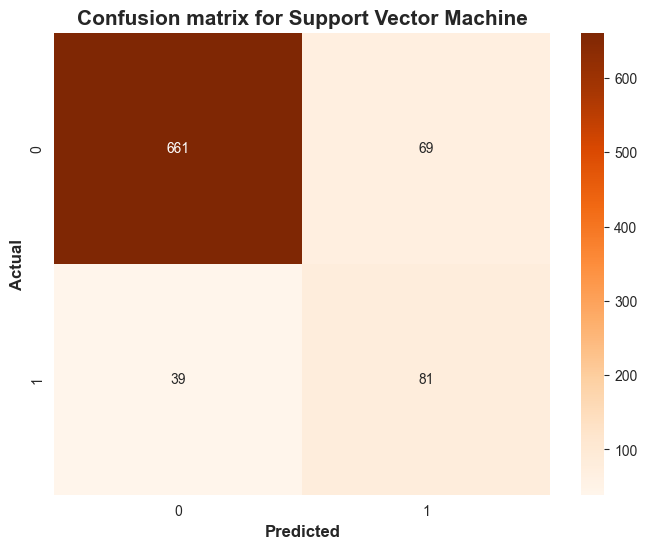

In [608]:
# Visualize confusion matrix 
y_pred_svm = svm.predict(X_test)
plot_confusion_matrix(y_test, y_pred_svm, 'Support Vector Machine')

#### **3. Evaluation**

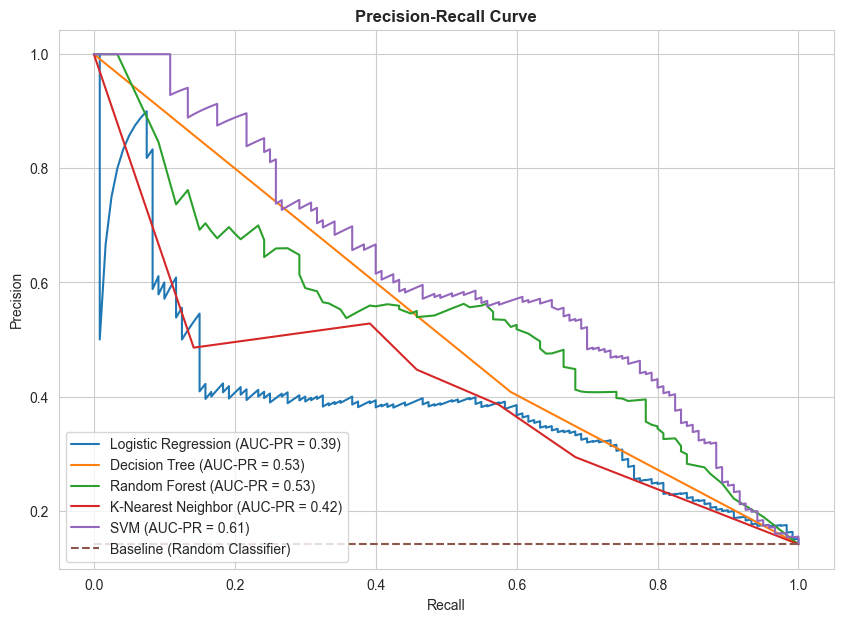

In [609]:
# Get the predicted probabilities for each model
y_probs_logreg = lr_clf.predict_proba(X_test)[:, 1]  # Get probabilities for class 1
y_probs_tree = tree_clf.predict_proba(X_test)[:, 1]
y_probs_forest = rf_clf.predict_proba(X_test)[:, 1]
y_probs_knn = knn.predict_proba(X_test)[:, 1]
y_probs_svm = svm.predict_proba(X_test)[:, 1]

# Calculate the proportion of positive cases in the test set
positive_ratio = np.sum(y_test) / len(y_test)

# Calculate precision-recall pairs and AUC-PR for each model
prec_logreg, recall_logreg, _ = precision_recall_curve(y_test, y_probs_logreg)
auc_pr_logreg = auc(recall_logreg, prec_logreg)
prec_tree, recall_tree, _ = precision_recall_curve(y_test, y_probs_tree)
auc_pr_tree = auc(recall_tree, prec_tree)
prec_forest, recall_forest, _ = precision_recall_curve(y_test, y_probs_forest)
auc_pr_forest = auc(recall_forest, prec_forest)
prec_knn, recall_knn, _ = precision_recall_curve(y_test, y_probs_knn)
auc_pr_knn = auc(recall_knn, prec_knn)
prec_svm, recall_svm, _ = precision_recall_curve(y_test, y_probs_svm)
auc_pr_svm = auc(recall_svm, prec_svm)

# Plot the Precision-Recall curve for each model
plt.figure(figsize=(10, 7))

# Logistic Regression PR curve
plt.plot(recall_logreg, prec_logreg, label=f'Logistic Regression (AUC-PR = {auc_pr_logreg:.2f})')

# Decision Tree PR curve
plt.plot(recall_tree, prec_tree, label=f'Decision Tree (AUC-PR = {auc_pr_tree:.2f})')

# Random Forest PR curve
plt.plot(recall_forest, prec_forest, label=f'Random Forest (AUC-PR = {auc_pr_forest:.2f})')

# K-nearest neighbor PR curve
plt.plot(recall_knn, prec_knn, label=f'K-Nearest Neighbor (AUC-PR = {auc_pr_knn:.2f})')

# SVM PR curve
plt.plot(recall_svm, prec_svm, label=f'SVM (AUC-PR = {auc_pr_svm:.2f})')

# Add a baseline
plt.plot([0, 1], [positive_ratio, positive_ratio], linestyle='--', label='Baseline (Random Classifier)')

# Configure the plot
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve', fontweight='bold')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

Therefore, based on the Precision Recall curve, I would choose the SVM model as the main model for this task. 

## **VI. Deployment**

In [610]:
# Drop necessary columns
data_predict = data_predict.loc[:, ['state', 'international_plan', 'number_vmail_messages', 'total_day_minutes','number_customer_service_calls']]
# Data preprocessing
# Encode categorical variables using dummy encoding
cat_cols_test = data_predict.select_dtypes(include=['object', 'category']).columns
data_predict = pd.get_dummies(data_predict, columns=cat_cols_test, drop_first=True)

# Scale numerical variables
num_cols_test = data_predict.select_dtypes(include=['int64', 'float64']).columns
data_predict[num_cols_test] = scaler.fit_transform(data_predict[num_cols_test])

# Predict
data_predict['churn'] = svm.predict(data_predict)
print(data_predict['churn'].value_counts())

# Convert into labels


churn
0    616
1    134
Name: count, dtype: int64
